In [9]:
import helita.io.ncdf as nd
import kmeans as kmeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [10]:
print(kmeans)

<module 'kmeans' from '/Users/clark/python_tools/K-Means-IRIS/k-means/kmeans.py'>


In [11]:
kmeansClass = kmeans.kmeans()

In [12]:
kmeansClass.read_data_ncdf(rbfilename='/net/opal/Volumes/Amnesia/mpi3drun/2Druns/genohm/rain/output_ray_l2d90x40r.ncdf')

True


In [7]:
print(kmeansClass.wvl1)

[ 30.          31.4         32.8         33.7         35.
  35.3         36.4         38.3         39.5         40.
  41.8         43.3         45.          46.          47.8
  48.9         49.9         50.          51.          51.2
  52.2         53.4         54.7         55.          56.1
  57.5         57.7         59.          59.2         60.
  60.5         60.8         62.2         62.4         63.9
  64.2         65.          65.8         66.          67.7
  68.          69.8         70.          70.1         72.
  72.3         74.4         74.7         75.          76.9
  77.2         79.6         79.9         80.          82.5
  82.8         85.          86.          88.6         89.3
  90.          92.2         93.          95.          96.
  97.         100.         100.3        101.3        104.4
 104.9        105.         106.         110.         111.1
 115.         115.5        116.69372444 116.69838482 116.70080404
 116.70206148 116.7027167  116.70305972 116.70324092 1

In [8]:
print(kmeansClass.inte)

<class 'netCDF4._netCDF4.Variable'>
float32 intensity(nx, ny, nwave)
    units: J s^-1 m^-2 Hz^-1 sr^-1
unlimited dimensions: 
current shape = (3465, 157, 915)
filling on, default _FillValue of 9.969209968386869e+36 used



In [9]:
kmeansClass.read_data_npz()

AttributeError: 'kmeans' object has no attribute 'read_data_npz'

In [10]:
print(kmeansClass.i_3)

AttributeError: 'kmeans' object has no attribute 'i_3'

In [11]:
print(kmeansClass.wvl)

AttributeError: 'kmeans' object has no attribute 'wvl'

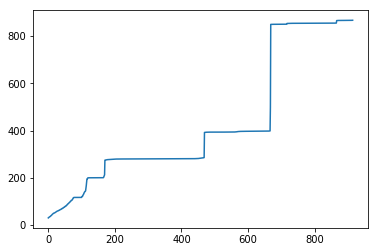

In [12]:
plt.plot(range(len(kmeansClass.wvl1)), kmeansClass.wvl1)
plt.show()

In [13]:
print(np.shape(kmeansClass.wvl1))

(915,)


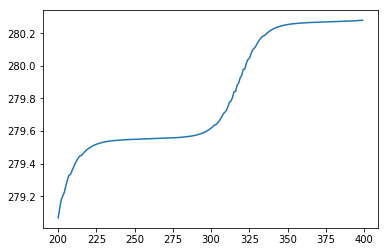

In [14]:
plt.plot(range(200, 400), kmeansClass.wvl1[200:400])
plt.show()

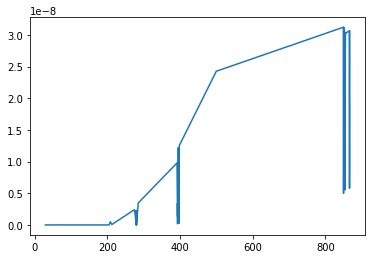

In [15]:
plt.plot(kmeansClass.wvl1, kmeansClass.inte[0, 0, :])
plt.show()

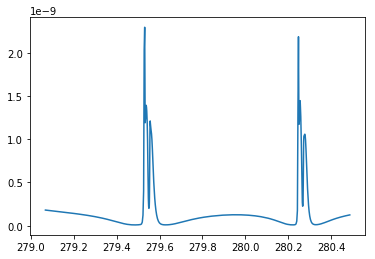

In [16]:
plt.plot(kmeansClass.wvl1[200:430], kmeansClass.inte[0, 0, 200:430])
plt.show()

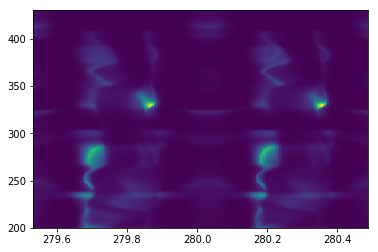

In [17]:
ax = plt.gca()
#ax.set_ylim(kmeansClass.inte[200], kmeansClass.inte[429])
plt.imshow(kmeansClass.inte[200:430, 0, 200:430], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[230], kmeansClass.wvl1[429], 200, 430))

plt.show()

In [18]:
kmeansClass.inte[0,0,200]

masked_array(data=1.808144745041318e-10,
             mask=False,
       fill_value=9.96921e+36,
            dtype=float32)

In [19]:
kmeansClass.inte[0,0,429]

masked_array(data=1.2478940103477498e-10,
             mask=False,
       fill_value=9.96921e+36,
            dtype=float32)

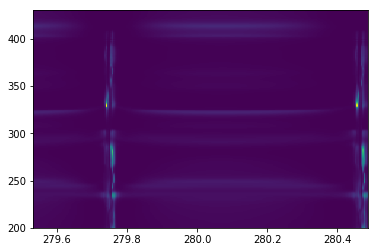

In [20]:
newW = np.linspace(kmeansClass.wvl1[230], kmeansClass.wvl1[429], 230)
#print(newW)
interped = np.zeros((230, 230))
for i in range(230):
    interped[i] = np.interp(newW, kmeansClass.wvl1[200:430], kmeansClass.inte[200+i, 0, 200:430])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[230], kmeansClass.wvl1[429], 200, 430))
plt.show()

In [21]:
print(np.shape(kmeansClass.inte[200:430, 0, 200:430]))

(230, 230)


In [22]:
kmeansClass.wavelength_distinction()

In [23]:
print(kmeansClass.limits)

[112, 116, 169, 170, 468, 469, 666, 667, 668, 865, 866, 914, 915]


In [24]:
limits = kmeansClass.limits

In [25]:
print(limits)

[112, 116, 169, 170, 468, 469, 666, 667, 668, 865, 866, 914, 915]


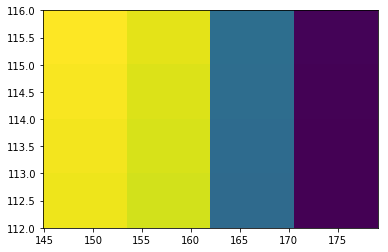

In [26]:
newW = np.linspace(kmeansClass.wvl1[112], kmeansClass.wvl1[116], 4)
#print(newW)
interped = np.zeros((4, 4))
for i in range(4):
    interped[i] = np.interp(newW, kmeansClass.wvl1[112:116], kmeansClass.inte[112+i, 0, 112:116])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[112], kmeansClass.wvl1[115], 112, 116))
plt.show()

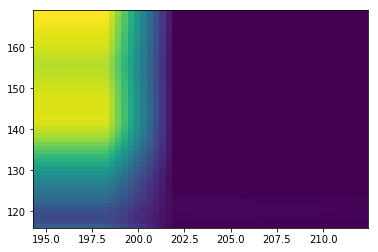

In [27]:
newW = np.linspace(kmeansClass.wvl1[116], kmeansClass.wvl1[169], 169-116)
#print(newW)
interped = np.zeros((53, 53))
for i in range(53):
    interped[i] = np.interp(newW, kmeansClass.wvl1[116:169], kmeansClass.inte[116+i, 0, 116:169])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[116], kmeansClass.wvl1[169], 116, 169))
plt.show()

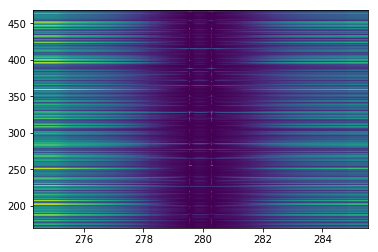

In [28]:
newW = np.linspace(kmeansClass.wvl1[170], kmeansClass.wvl1[468], 468-170)
#print(newW)
interped = np.zeros((3465, 298))
for i in range(3465):
    interped[i] = np.interp(newW, kmeansClass.wvl1[170:468], kmeansClass.inte[i, 0, 170:468])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[170], kmeansClass.wvl1[468], 170, 468))
plt.show()

468
170


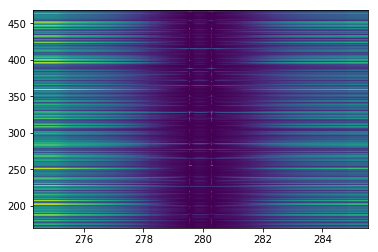

In [39]:
k=3
upper, lower = setBounds(k)
doImshowInterpolated(upper, lower)
plt.show()

468
170


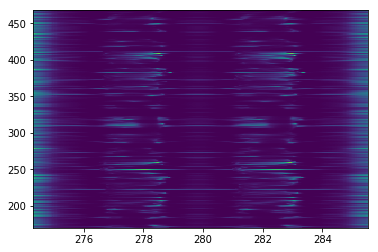

In [40]:
k=3
upper, lower=setBounds(k)
doImshowNonInterpolated(upper, lower)
plt.show()

666
469


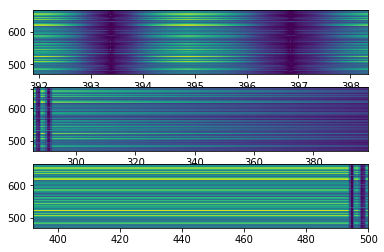

In [41]:
#k is index of the limits array
k = 5;
upper, lower= setBounds(k)
doImshowInterpolated(upper, lower, 311)
#print('upper: ', upper, ' lower: ', lower)

#newW = np.linspace(kmeansClass.wvl1[lower], kmeansClass.wvl1[upper], upper-lower)
#print(newW)

#plt.subplot(311)
#interped = np.zeros((lenSpace, upper-lower))
#for i in range(lenSpace):
#    interped[i] = np.interp(newW, kmeansClass.wvl1[lower:upper], kmeansClass.inte[i, 0, lower:upper])

#plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[lower], kmeansClass.wvl1[upper], lower, upper))

lower-=1
doImshowInterpolated(upper, lower, 312)
#print('upper: ', upper, ' lower: ', lower)

#plt.subplot(312)
#newW = np.linspace(kmeansClass.wvl1[468], kmeansClass.wvl1[666], 666-469)
#interped = np.zeros((666-469, 666-469))
#for i in range(666-469):
#    interped[i] = np.interp(newW, kmeansClass.wvl1[469:666], kmeansClass.inte[469+i, 0, 469:666])

#plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[469], kmeansClass.wvl1[666], 469, 666))

lower+=1
upper+=1
doImshowInterpolated(upper, lower, 313)
#print('upper: ', upper, ' lower: ', lower)

#plt.subplot(313)
#newW = np.linspace(kmeansClass.wvl1[469], kmeansClass.wvl1[667], 666-469)
#interped = np.zeros((666-469, 666-469))
#for i in range(666-469):
#    interped[i] = np.interp(newW, kmeansClass.wvl1[469:666], kmeansClass.inte[469+i, 0, 469:666])

#plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[469], kmeansClass.wvl1[666], 469, 666))

plt.show()

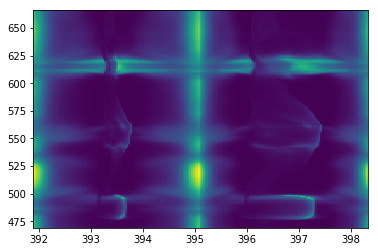

In [42]:
newW = wvl1[469:666]
#print(newW)
interped = np.zeros((666-469, 666-469))
for i in range(666-469):
    interped[i] = np.interp(newW, kmeansClass.wvl1[469:666], kmeansClass.inte[469+i, 0, 469:666])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', origin='lower', extent=(kmeansClass.wvl1[469], kmeansClass.wvl1[666], 469, 666))

plt.show()

666
469


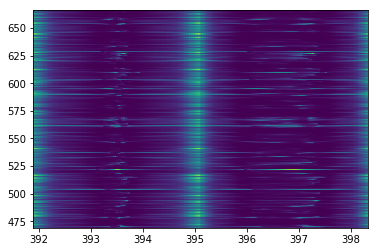

In [43]:
k=5
upper, lower = setBounds(k)
doImshowNonInterpolated(upper, lower)
plt.show()

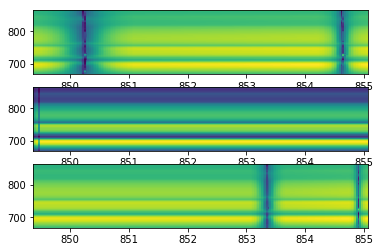

In [44]:
plt.subplot(311)
newW = np.linspace(kmeansClass.wvl1[668], kmeansClass.wvl1[865], 865-668)
#print(newW)
interped = np.zeros((865-668, 865-668))
for i in range(865-668):
    interped[i] = np.interp(newW, kmeansClass.wvl1[668:865], kmeansClass.inte[668+i, 0, 668:865])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[668], kmeansClass.wvl1[865], 668, 865))

plt.subplot(312)
newW = np.linspace(kmeansClass.wvl1[667], kmeansClass.wvl1[865], 865-668)
#print(newW)
interped = np.zeros((865-668, 865-668))
for i in range(865-668):
    interped[i] = np.interp(newW, kmeansClass.wvl1[668:865], kmeansClass.inte[668+i, 0, 668:865])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[668], kmeansClass.wvl1[865], 668, 865))

plt.subplot(313)
newW = np.linspace(kmeansClass.wvl1[668], kmeansClass.wvl1[866], 865-668)
#print(newW)
interped = np.zeros((865-668, 865-668))
for i in range(865-668):
    interped[i] = np.interp(newW, kmeansClass.wvl1[668:865], kmeansClass.inte[668+i, 0, 668:865])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[668], kmeansClass.wvl1[865], 668, 865))

plt.show()

865
668


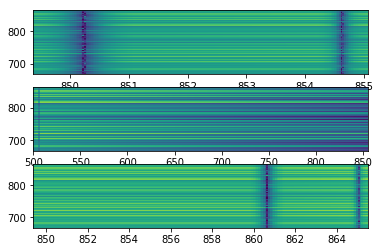

In [45]:
k=8
upper, lower = setBounds(k)
doImshowInterpolated(upper, lower, 311)

lower-=1
doImshowInterpolated(upper, lower, 312)

lower+=1
upper+=1
doImshowInterpolated(upper, lower, 313)
plt.show()

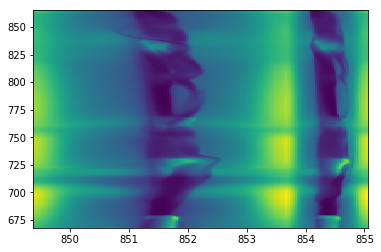

In [46]:
#plt.subplot(311)
newW = wvl1[668:865]
#print(newW)
interped = np.zeros((865-668, 865-668))
for i in range(865-668):
    interped[i] = np.interp(newW, kmeansClass.wvl1[668:865], kmeansClass.inte[668+i, 0, 668:865])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[668], kmeansClass.wvl1[865], 668, 865))

#plt.subplot(312)
#newW = np.linspace(kmeansClass.wvl1[667], kmeansClass.wvl1[865], 865-668)
#print(newW)
#interped = np.zeros((865-668, 865-668))
#for i in range(865-668):
#    interped[i] = np.interp(newW, kmeansClass.wvl1[668:865], kmeansClass.inte[668+i, 0, 668:865])

#plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[668], kmeansClass.wvl1[865], 668, 865))

#plt.subplot(313)
#newW = np.linspace(kmeansClass.wvl1[668], kmeansClass.wvl1[866], 865-668)
#print(newW)
#interped = np.zeros((865-668, 865-668))
#for i in range(865-668):
#    interped[i] = np.interp(newW, kmeansClass.wvl1[668:865], kmeansClass.inte[668+i, 0, 668:865])

#plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[668], kmeansClass.wvl1[865], 668, 865))

plt.show()

865
668


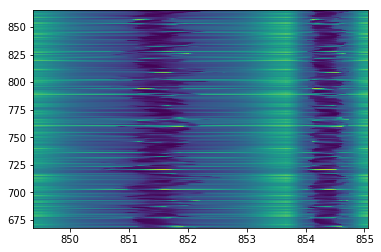

In [47]:
k=8
upper, lower=setBounds(k)
doImshowNonInterpolated(upper, lower)
plt.show()

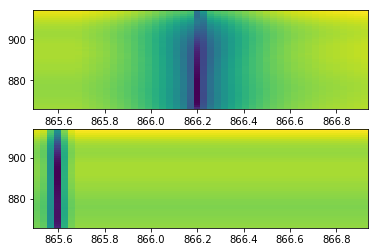

In [48]:
plt.subplot(211)
newW = np.linspace(kmeansClass.wvl1[866], kmeansClass.wvl1[914], 914-866)
#print(newW)
interped = np.zeros((914-866, 914-866))
for i in range(914-866):
    interped[i] = np.interp(newW, kmeansClass.wvl1[866:914], kmeansClass.inte[866+i, 0, 866:914])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[866], kmeansClass.wvl1[914], 866, 914))

plt.subplot(212)
newW = np.linspace(kmeansClass.wvl1[865], kmeansClass.wvl1[914], 914-866)
#print(newW)
interped = np.zeros((914-866, 914-866))
for i in range(914-866):
    interped[i] = np.interp(newW, kmeansClass.wvl1[866:914], kmeansClass.inte[866+i, 0, 866:914])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[866], kmeansClass.wvl1[914], 866, 914))

plt.show()

914
866


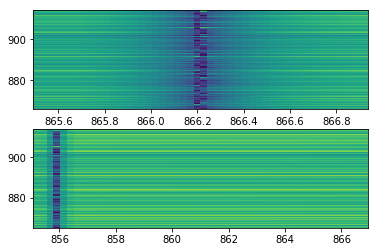

In [49]:
k=10
upper, lower = setBounds(k)
doImshowInterpolated(upper, lower, 211)

lower-=1
doImshowInterpolated(upper, lower, 212)
plt.show()

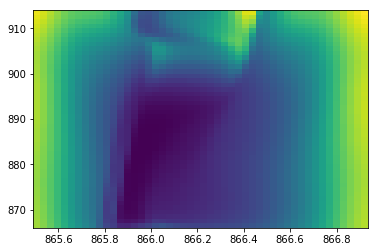

In [50]:
newW = wvl1[866:914]
#print(newW)
interped = np.zeros((914-866, 914-866))
for i in range(914-866):
    interped[i] = np.interp(newW, kmeansClass.wvl1[866:914], kmeansClass.inte[866+i, 0, 866:914])

plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[866], kmeansClass.wvl1[914], 866, 914))
plt.show()

914
866


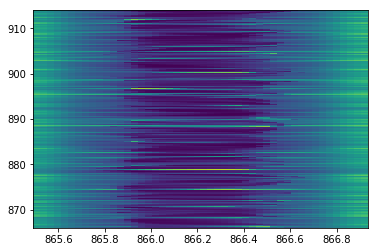

In [51]:
k=10
upper, lower = setBounds(k)
doImshowNonInterpolated(upper, lower)
plt.show()

In [52]:
kmeansClass.individual_spectral_data()

In [53]:
print(kmeansClass.new_inte)

{0: masked_array(
  data=[[[1.6144520819500428e-14, 1.360455954298569e-14,
          2.5353169948649432e-14],
         [2.199001716124676e-14, 2.024943899353853e-14,
          3.691893389308823e-14],
         [2.4191598092695825e-14, 2.2831127654133858e-14,
          4.1555500766799966e-14],
         ...,
         [1.2661182866025023e-12, 1.1047227585839203e-12,
          2.014725409074658e-12],
         [1.4560099003205207e-12, 1.6184641517605347e-12,
          2.9610411345082355e-12],
         [2.61356935442672e-13, 7.993679503048856e-13,
          1.6337450055997627e-12]],

        [[1.5505268442339397e-14, 1.2912440451454728e-14,
          2.3838146490399656e-14],
         [1.559766787842358e-14, 1.3930026870770471e-14,
          2.540567582698383e-14],
         [1.8084097519704793e-14, 1.663070417869724e-14,
          3.0270778966128356e-14],
         ...,
         [1.3635922902974218e-12, 1.2563186168462748e-12,
          2.2916269576400694e-12],
         [1.2658888694228043e-12,

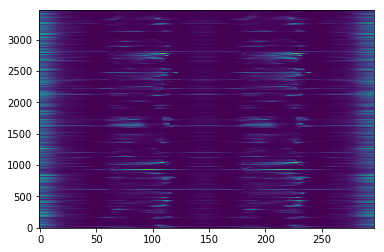

In [54]:
plt.imshow(kmeansClass.new_inte[2][:,0, ::-1], aspect='auto', origin='lower', interpolation='none')

plt.show()

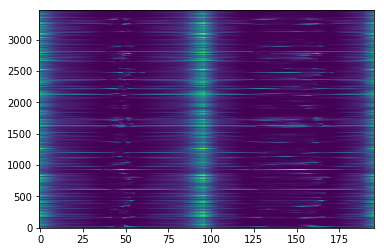

In [55]:
#plt.imshow(kmeansClass.new_inte[4][:, 0, :], aspect='auto', origin='lower', interpolation='none', extent=(np.min(new_inte[0][:,0,0]), np.max(new_inte[0][:, 0, 0]), np.min(new_inte[0][0, 0, :]), np.max(new_inte[0][0, 0, :])))

#plt.imshow(kmeansClass.new_inte[3][469:666,0, ::-1], aspect='auto', origin='lower', interpolation='none')
plt.imshow(kmeansClass.new_inte[3][:,0, ::-1], aspect='auto', origin='lower', interpolation='none')

plt.show()

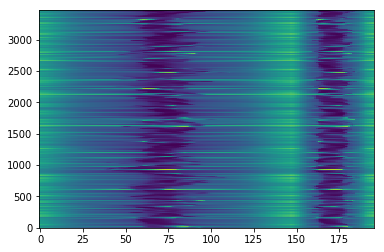

In [56]:
plt.imshow(kmeansClass.new_inte[4][:,0, ::-1], aspect='auto', origin='lower', interpolation='none')

plt.show()

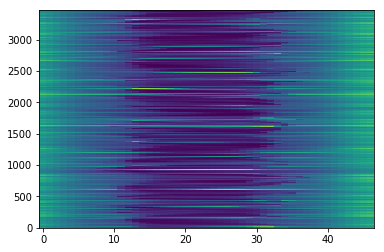

In [57]:
plt.imshow(kmeansClass.new_inte[5][:,0, ::-1], aspect='auto', origin='lower', interpolation='none')

plt.show()

In [58]:
new_inte = kmeansClass.new_inte

In [59]:
wvl1 = kmeansClass.wvl1

In [60]:
def setBounds(k):
    upper=limits[k+1]
    print(upper)
    lower=limits[k]
    print(lower)
    return upper, lower

In [61]:
print(np.shape(inte))

(3465, 157, 915)


In [62]:
inte = kmeansClass.inte

In [63]:
lenSpace = len(inte)
print(lenSpace)

3465


In [64]:
def doImshowInterpolated(up, low, sub=False):
    if(sub):
        plt.subplot(sub)
    newW = np.linspace(kmeansClass.wvl1[low], kmeansClass.wvl1[up], up-low)

    interped = np.zeros((lenSpace, up-low))
    for i in range(lenSpace):
        interped[i] = np.interp(newW, kmeansClass.wvl1[low:up], kmeansClass.inte[i, 0, low:up])

    plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', extent=(kmeansClass.wvl1[low], kmeansClass.wvl1[up], low, up))

In [65]:
def doImshowNonInterpolated(up, low, sub=False):
    if(sub):
        plt.subplot(sub)
    newW = wvl1[low:up]
    interped = np.zeros((lenSpace, up-low))
    for i in range(lenSpace):
        interped[i] = np.interp(newW, kmeansClass.wvl1[low:up], kmeansClass.inte[i, 0, low:up])

    plt.imshow(interped[:,::-1], aspect='auto', interpolation='none', origin='lower', extent=(kmeansClass.wvl1[low], kmeansClass.wvl1[up], low, up))


In [66]:
kmeansClass.wvl1.shape

(915,)

In [67]:
np.shape(kmeansClass.wvl1)

(915,)

In [68]:
np.shape(kmeansClass.inte)

(3465, 157, 915)

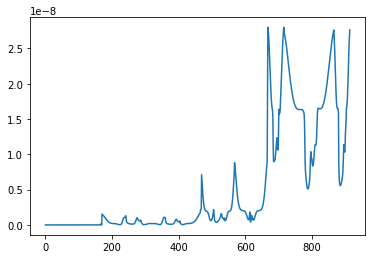

In [69]:
plt.plot(inte[100, 100, :])
plt.show()

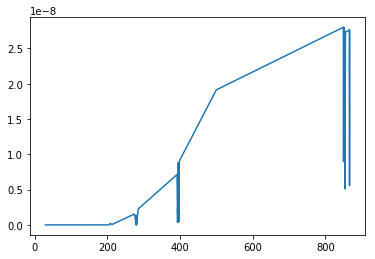

In [70]:
plt.plot(kmeansClass.wvl1,inte[100, 100, :])
plt.show()

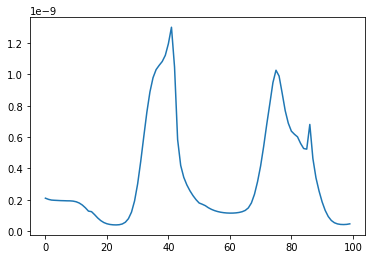

In [71]:
plt.plot(inte[100, 100, 200:300])
plt.show()

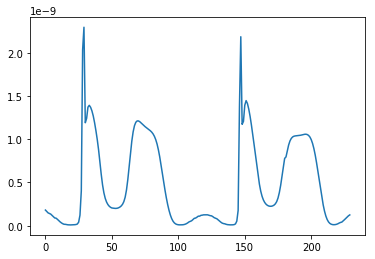

In [72]:
plt.plot(inte[0, 0, 200:430])

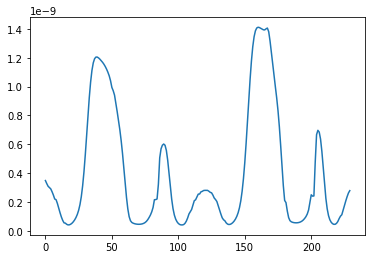

In [73]:
plt.plot(inte[40, 10, 200:430])

In [74]:
np.shape(new_inte)

()

In [75]:
print(new_inte)

{0: masked_array(
  data=[[[1.6144520819500428e-14, 1.360455954298569e-14,
          2.5353169948649432e-14],
         [2.199001716124676e-14, 2.024943899353853e-14,
          3.691893389308823e-14],
         [2.4191598092695825e-14, 2.2831127654133858e-14,
          4.1555500766799966e-14],
         ...,
         [1.2661182866025023e-12, 1.1047227585839203e-12,
          2.014725409074658e-12],
         [1.4560099003205207e-12, 1.6184641517605347e-12,
          2.9610411345082355e-12],
         [2.61356935442672e-13, 7.993679503048856e-13,
          1.6337450055997627e-12]],

        [[1.5505268442339397e-14, 1.2912440451454728e-14,
          2.3838146490399656e-14],
         [1.559766787842358e-14, 1.3930026870770471e-14,
          2.540567582698383e-14],
         [1.8084097519704793e-14, 1.663070417869724e-14,
          3.0270778966128356e-14],
         ...,
         [1.3635922902974218e-12, 1.2563186168462748e-12,
          2.2916269576400694e-12],
         [1.2658888694228043e-12,

(3465, 157, 47)


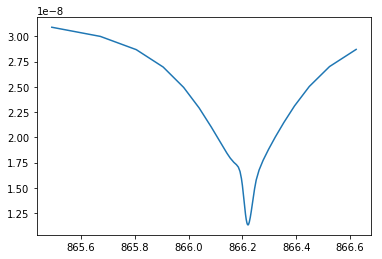

In [88]:
iwvl=5
print(np.shape(new_inte[iwvl]))
plt.plot(kmeansClass.wvlax[5], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0))

ValueError: x and y must have same first dimension, but have shapes (52,) and (47,)

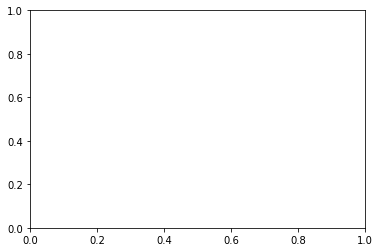

In [77]:
plt.plot(wvl1[kmeansClass.limits[1]:kmeansClass.limits[2]-1],np.mean(np.mean(new_inte[iwvl],axis=0),axis=0))

In [78]:
for i in range(8):
    print(kmeansClass.limits[i])

112
116
169
170
468
469
666
667


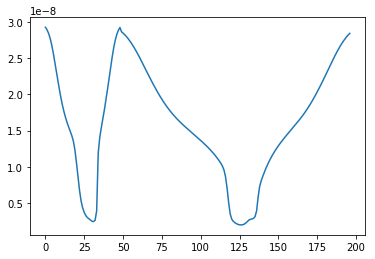

In [79]:
plt.plot(inte[670, 0, 668:865])

In [83]:
np.shape(kmeansClass.new_inte1[4])

KeyError: 4

In [13]:
kmeansClass.read_lim_interp(rbfilename='/net/opal/Volumes/Amnesia/mpi3drun/2Druns/genohm/rain/output_ray_l2d90x40r.ncdf', ind=5)

True
new_inte1 5 (3465, 157, 1280)


In [91]:
def any_gaussian(x, *all_params):
    sum = all_params[0]
    params = np.array(all_params[1:]).reshape(int(len(all_params[1:])/3.), 3)
    for i in params:
        sum += i[0] * np.exp(-1*np.square(x-i[1])/(2*np.square(i[2])))
    return sum

In [102]:
def double_gaussian(x, const, a, b, c, d, e, f):
    result = const + a * np.exp(-1*np.square(x-b)/(2*np.square(c))) + d * np.exp(-1*np.square(x-e)/(2*np.square(f)))
    return result

In [154]:
def short_gaussian(x, a, b, c, display=0):
    result = a * np.exp(-1*np.square(x-b)/(2*np.square(c)))
    
    if display == 1:
        plt.plot(x, result)
        plt.show()
    
    return result

(3465, 157, 47)


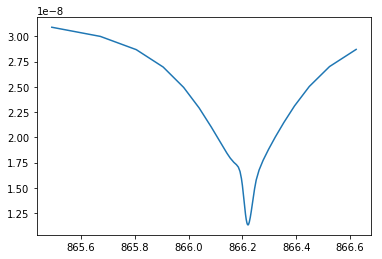

In [219]:
iwvl=5
print(np.shape(new_inte[iwvl]))
kmeansClass.print_list_wvl
plt.plot(kmeansClass.wvlax[iwvl], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0))
print(kmeansClass.)

In [90]:
np.min(np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0))

1.1326838206694005e-08

In [116]:
initial_vals = (1.13e-8, 3.2e-8, 865, 4, 3e-8, 866.8, 4)

In [117]:
limits = ([0, 0, 860, 0.6, 0, 866.4, 0.4],[2e-8, 4e-8, 866, 10, 4e-8, 870, 10])

In [134]:
opt, pcov = curve_fit(any_gaussian, kmeansClass.wvlax[5], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0), p0=initial_vals, bounds=limits)

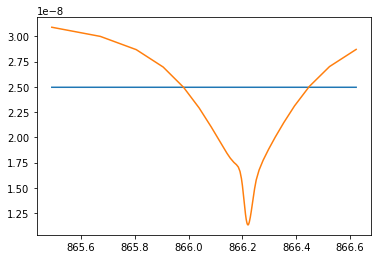

In [131]:
plt.plot(kmeansClass.wvlax[5], any_gaussian(kmeansClass.wvlax[5], *opt))
plt.plot(kmeansClass.wvlax[5], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0))
plt.show()

In [132]:
any_gaussian(kmeansClass.wvlax[5], *opt)

array([2.49577718e-08, 2.49577718e-08, 2.49577718e-08, ...,
       2.49577718e-08, 2.49577718e-08, 2.49577718e-08])

In [127]:
print(any_gaussian(kmeansClass.wvlax[5], *opt)[2])

2.495777179483765e-08


In [128]:
print(kmeansClass.wvlax[5].shape)

(1280,)


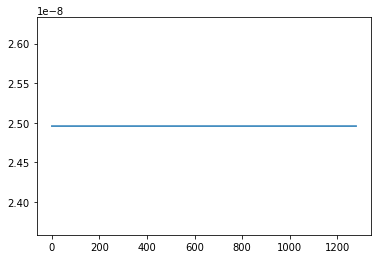

In [129]:
plt.plot(any_gaussian(kmeansClass.wvlax[5], *opt))

In [135]:
initial_vals = (3e-8, -2e-8, 866.2, 0.3)
limits = ([0, -2, 866, 0.06],[1, 4e-8, 866.4, 1])

In [136]:
opt, pcov = curve_fit(any_gaussian, kmeansClass.wvlax[5], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0), p0=initial_vals, bounds=limits)

array([2.97547158e-08, 2.97547005e-08, 2.97546848e-08, ...,
       2.91713163e-08, 2.91792589e-08, 2.91871105e-08])

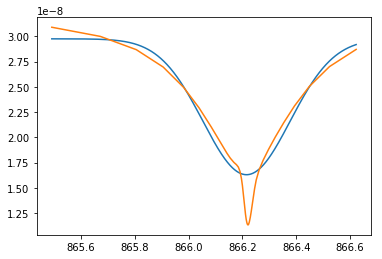

In [140]:
plt.plot(kmeansClass.wvlax[5], any_gaussian(kmeansClass.wvlax[5], *opt))
plt.plot(kmeansClass.wvlax[5], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0))
plt.show()

In [199]:
initial_vals = (3e-8, -1.25e-8, 866.2, 0.3,  -1.75e-9, 866.25, 0.01)
limits = ([0, -1.8e-8, 866.1, 0.002, -2.5e-9, 866.21, 0.002],[5e-8, 4e-8, 866.3, 1, 1e-8, 866.3, .1])

In [200]:
opt, pcov = curve_fit(any_gaussian, kmeansClass.wvlax[5], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0), p0=initial_vals, bounds=limits)

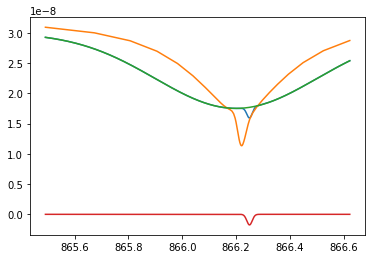

In [201]:
plt.plot(kmeansClass.wvlax[5], any_gaussian(kmeansClass.wvlax[5], *opt))
plt.plot(kmeansClass.wvlax[5], np.mean(np.mean(kmeansClass.new_inte1[iwvl],axis=0),axis=0))
plt.plot(kmeansClass.wvlax[5], opt[0] + short_gaussian(kmeansClass.wvlax[5], *opt[1:4]))
plt.plot(kmeansClass.wvlax[5], short_gaussian(kmeansClass.wvlax[5], *opt[4:7]))
plt.show()

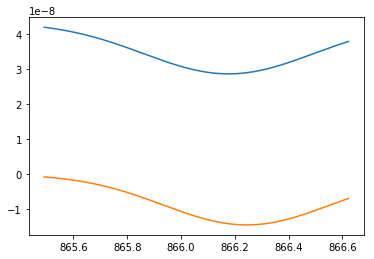

In [158]:
plt.plot(kmeansClass.wvlax[5], opt[0] + short_gaussian(kmeansClass.wvlax[5], *opt[1:4]))
plt.plot(kmeansClass.wvlax[5], short_gaussian(kmeansClass.wvlax[5], *opt[4:7]))

In [173]:
print('hi')

hi


In [221]:
np.min(kmeansClass.new_inte1[5][:,:,:]) 

4.3849735180159407e-10

In [223]:
mins = np.zeros((len(kmeansClass.new_inte1[5]), len(kmeansClass.new_inte1[5][0])))

In [224]:
mins.shape

(3465, 157)

In [226]:
for i in range(len(mins)):
    for j in range(len(mins[0])):
        mins[i,j] = np.min(kmeansClass.new_inte1[5][i,j,:])

In [227]:
print(mins)

[[5.80572325e-09 3.78878710e-09 4.05334594e-09 ... 5.90802507e-09
  5.06706527e-09 5.67619048e-09]
 [5.74094110e-09 3.76622292e-09 3.44094442e-09 ... 6.28440162e-09
  5.25477719e-09 5.41254606e-09]
 [5.67889156e-09 3.80266922e-09 3.02523647e-09 ... 6.60152157e-09
  5.71626419e-09 5.13972237e-09]
 ...
 [5.74291810e-09 4.02633890e-09 4.81607894e-09 ... 5.16903178e-09
  4.88952771e-09 6.46464739e-09]
 [5.85361024e-09 3.98902197e-09 4.76925841e-09 ... 5.25861198e-09
  4.92202469e-09 6.38829963e-09]
 [5.85609046e-09 3.86403533e-09 4.55010758e-09 ... 5.55290288e-09
  4.93955269e-09 5.97836764e-09]]


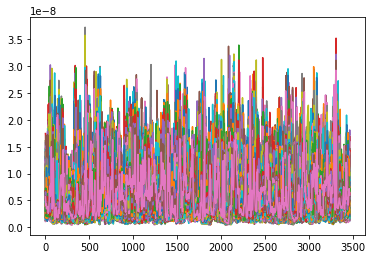

In [229]:
plt.plot(mins)
plt.show()

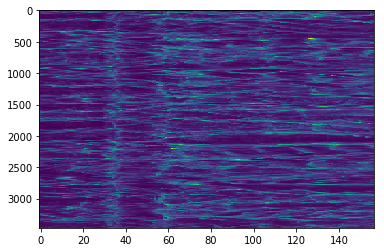

In [232]:
plt.imshow(mins, aspect='auto')

In [231]:
mins.shape

(3465, 157)

In [6]:
kmeansClass.inte.shape

(3465, 157, 915)

In [15]:
kmeansClass.new_inte1[5].shape

(3465, 157, 1280)

In [14]:
kmeansClass.new_inte1[5]

array([[[3.06231946e-08, 3.06181713e-08, 3.06131480e-08, ...,
         2.80677936e-08, 2.80850366e-08, 2.81022796e-08],
        [3.00661291e-08, 3.00612263e-08, 3.00563235e-08, ...,
         2.75462813e-08, 2.75633310e-08, 2.75803806e-08],
        [2.99854470e-08, 2.99805666e-08, 2.99756862e-08, ...,
         2.74561383e-08, 2.74732919e-08, 2.74904455e-08],
        ...,
        [3.41731763e-08, 3.41668455e-08, 3.41605148e-08, ...,
         3.10348118e-08, 3.10572402e-08, 3.10796686e-08],
        [3.44971056e-08, 3.44908688e-08, 3.44846319e-08, ...,
         3.13938604e-08, 3.14161357e-08, 3.14384110e-08],
        [3.38879040e-08, 3.38821538e-08, 3.38764036e-08, ...,
         3.10162910e-08, 3.10370214e-08, 3.10577519e-08]],

       [[3.04702681e-08, 3.04652483e-08, 3.04602285e-08, ...,
         2.79118767e-08, 2.79290801e-08, 2.79462835e-08],
        [2.99858378e-08, 2.99809431e-08, 2.99760484e-08, ...,
         2.74643622e-08, 2.74813829e-08, 2.74984036e-08],
        [2.98945686e-08, 